# Processing, Manipulation, Transformation and Visualization

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
df_top25 = pd.read_csv('../Outputs/top_250.csv')
df_new_movies_ES = pd.read_csv('../Outputs/new_movies_ES.csv')
df_new_movies_DE = pd.read_csv('../Outputs/new_movies_DE.csv')
df_new_movies_IT = pd.read_csv('../Outputs/new_movies_IT.csv')
df_new_movies_GB = pd.read_csv('../Outputs/new_movies_GB.csv')
df_awards = pd.read_csv('../Outputs/awards.csv')

# 1. Top 250 Movies 
### __Questions:__
* ¿Is there any relationship between the duration of the movies and the calification obtained? 
* ¿Is there any relationship between the category/rating of the movie and its duration?

__Data Manipulation and Treatment__
* Transform duration times into minutes
* Replacing labels in the "Rating" column so they are normalized
* Group movies by its rating
  
__Visualization__
* Matrix of scatter plots (duration-clalification)
* Each plot refering to a rating class

In [28]:
df_top25.head()

,Movie,Calification,N.Reviews,Year,Duration,Rating
0,The Shawshank Redemption,9.3,2.9M,1994,2h 22m,R
1,The Godfather,9.2,2M,1972,2h 55m,R
2,The Dark Knight,9.0,2.9M,2008,2h 32m,PG-13
3,The Godfather Part II,9.0,1.4M,1974,3h 22m,R
4,12 Angry Men,9.0,861K,1957,1h 36m,Approved


In [29]:
# Function to convert the duration of a movie from hours and minutes to minutes
def time_to_mins(duracion):
    duracion = duracion.strip() 
    if 'h' in duracion and 'm' in duracion:
        horas, minutos = duracion.split('h ')
        horas = int(horas)
        minutos = int(minutos.replace('m', ''))
        return horas * 60 + minutos
    elif 'h' in duracion:
        horas = int(duracion.split('h')[0])
        return horas * 60
    elif 'm' in duracion:
        minutos = int(duracion.split('m')[0])
        return minutos
    else:
        return 0  # If the duration is not specified, we return 0

In [30]:
df_top25['Duration'] = df_top25['Duration'].apply(time_to_mins)

In [31]:
# look for unique values in Rating column
print(df_top25['Rating'].unique())
# count the number of unique values in Rating column
print(df_top25['Rating'].value_counts())
# find the index of the rows with 'Not Rated' in the Rating column
print(df_top25[df_top25['Rating'] == 'Not Rated'].index.tolist())

['R' 'PG-13' 'Approved' 'PG' 'Not Rated' 'G' nan 'Passed' 'hR' 'Unrated'
 '18+' 'X' 'GP']
Rating
R            94
PG-13        37
PG           37
Not Rated    21
G            18
Passed       16
Approved     15
hR            5
Unrated       1
18+           1
X             1
GP            1
Name: count, dtype: int64
[22, 43, 44, 85, 91, 98, 118, 123, 127, 152, 156, 191, 202, 203, 206, 212, 213, 222, 233, 235, 239]


In [32]:
# Unifiying the rating system
df_top25.loc[203, 'Rating'] = '18'
df_top25.loc[206, 'Rating'] = '13'
df_top25.loc[227, 'Rating'] = '13'
df_top25.loc[235, 'Rating'] = '13'
df_top25['Rating'] = df_top25['Rating'].replace('A/i', 'A')
df_top25['Rating'] = df_top25['Rating'].replace('7/i', '7')
df_top25['Rating'] = df_top25['Rating'].replace('PG', '7')
df_top25['Rating'] = df_top25['Rating'].replace('T', '13')
df_top25['Rating'] = df_top25['Rating'].replace('14', '16')
df_top25['Rating'] = df_top25['Rating'].replace('12', '13')
df_top25['Rating'] = df_top25['Rating'].replace('PG-13', '13')
df_top25['Rating'] = df_top25['Rating'].replace('Apta para mayores', '18')
df_top25['Rating'] = df_top25['Rating'].replace('(Banned)', '18')
df_top25['Rating'] = df_top25['Rating'].replace('Passed', '18')

In [33]:
df_top25.head()

,Movie,Calification,N.Reviews,Year,Duration,Rating
0,The Shawshank Redemption,9.3,2.9M,1994,142,R
1,The Godfather,9.2,2M,1972,175,R
2,The Dark Knight,9.0,2.9M,2008,152,13
3,The Godfather Part II,9.0,1.4M,1974,202,R
4,12 Angry Men,9.0,861K,1957,96,Approved


In [10]:
# Save CSV
df_top25.to_csv('../Outputs/top_250_cleaned.csv', index=False)

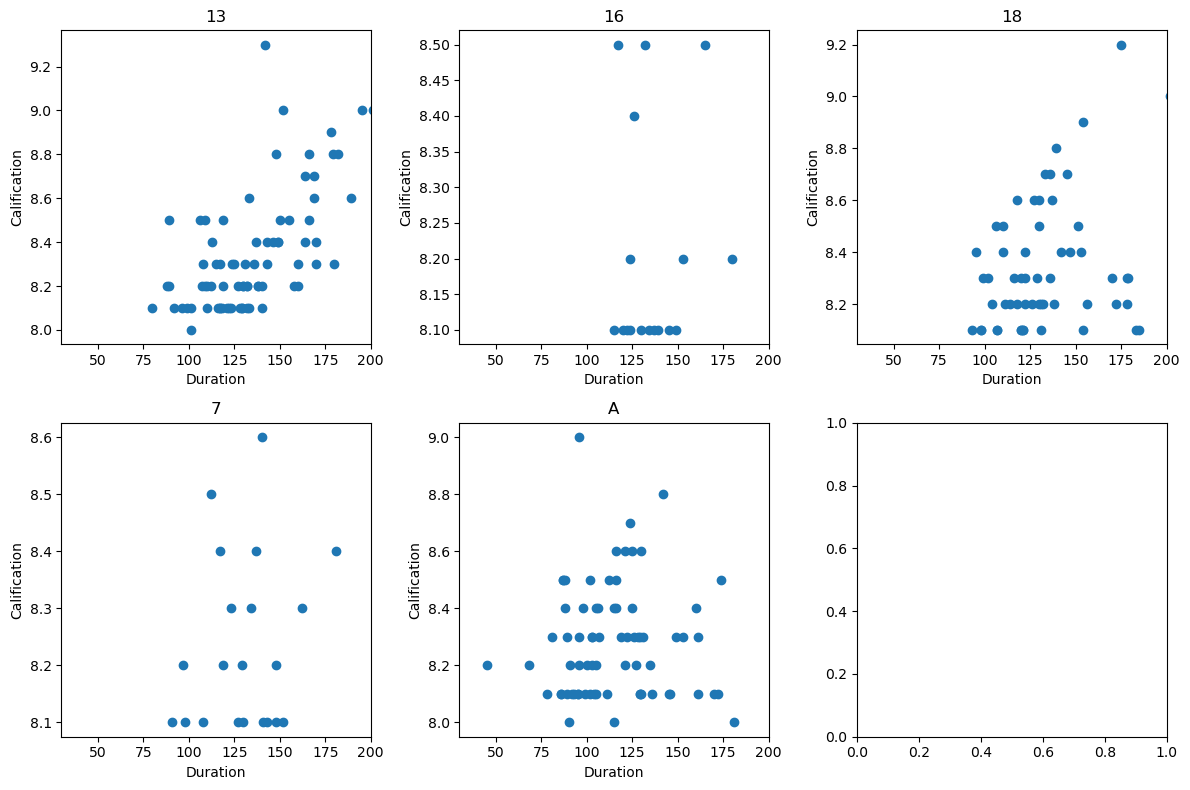

In [11]:
# Obtain every rating class
rating_cat = df_top25['Rating'].unique()


n_rows = 2  
n_cols = (len(rating_cat) + 1) // n_rows  
fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, (rating, rating_data) in enumerate(df_top25.groupby('Rating')): # Group by rating
    row = i // n_cols
    col = i % n_cols
    
    ax = axs[row, col] if n_rows > 1 else axs[col]
    ax.scatter(rating_data['Duration'], rating_data['Calification'])
    
    ax.set_title(rating)
    ax.set_xlabel('Duration')
    ax.set_ylabel('Calification')
    
    ax.set_xlim(30, 200)

plt.tight_layout()
plt.show()



### __Extra Question:__
* Who the duration of the movies has evolved over the years?

__Data Manipulation and Treatment__
* Group "Duration" by "Year"
* Apply mean() function to "Duration" of each year

__Data Visualization__
* Line plot

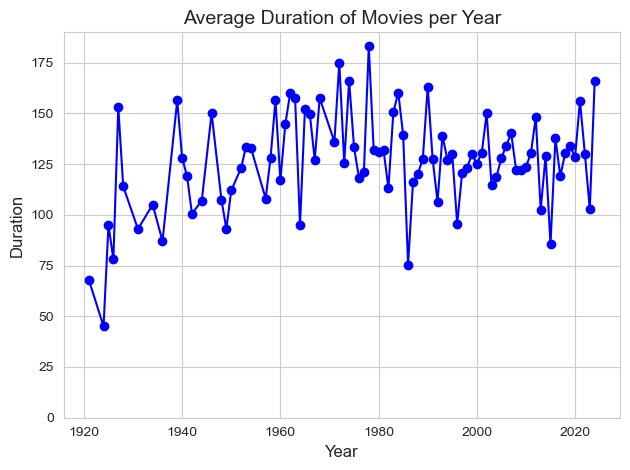

In [34]:

sns.set_style("whitegrid")

# mean duration of movies per year (Group by, mean())
df_top25.groupby('Year')['Duration'].mean().plot(kind='line', linewidth=1.5, marker='o', color='b')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Average Duration of Movies per Year', fontsize=14)

plt.ylim(bottom=0)

plt.tight_layout()
plt.show()

# 2. New Releases Visualization

### __Question:__
* What is the distribution of upcoming movie genres, broken down by country?

__Data Manipulation and Treatment__
* Concatenate 4 DataFrames (one per country)
* Include new column with "Country" Category
* Group by "Country"

__Data Visualization__
* Stacked bar chart

In [13]:
# Concatenate df of new movies adding a column with the country
df_new_movies_ES['Country'] = 'ES'
df_new_movies_DE['Country'] = 'DE'
df_new_movies_IT['Country'] = 'IT'
df_new_movies_GB['Country'] = 'GB'
df_new_movies = pd.concat([df_new_movies_ES, df_new_movies_DE, df_new_movies_IT, df_new_movies_GB])


In [14]:

# save
df_new_movies.to_csv('../Outputs/new_movies.csv', index=False)
df_new_movies.head()

,Date,Title,Genres,Country
0,"Apr 05, 2024",The First Omen (2024),['Horror'],ES
1,"Apr 05, 2024",Wicked Little Letters (2023),"['Comedy', 'Crime', 'Drama']",ES
2,"Apr 05, 2024",Freelance (2023),"['Action', 'Comedy']",ES
3,"Apr 05, 2024",Johnny Puff: Secret Mission (2024),['Animation'],ES
4,"Apr 05, 2024",Consent (2023),"['Biography', 'Drama']",ES


In [15]:
df_new_movies_cleaned = pd.read_csv('../Outputs/new_movies_cleaned.csv')

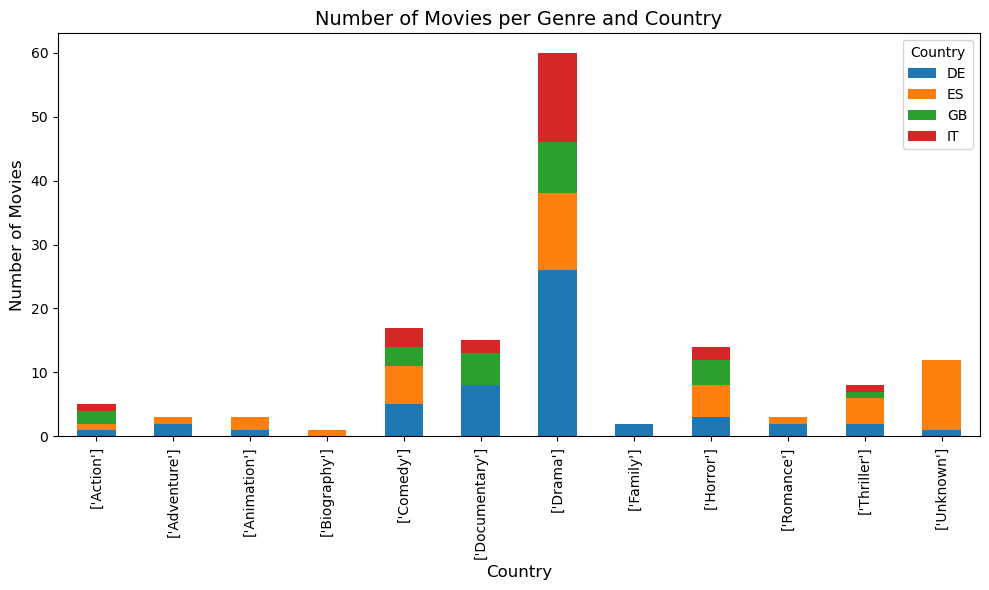

In [18]:
# grafico de barras apiladas, cada barra un género, con la altura de cada barra representando la cantidad de películas de ese género en cada país. Cada país tiene un color distinto.
df_new_movies_cleaned.groupby('Genres')['Country'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Number of Movies per Genre and Country', fontsize=14)

plt.tight_layout()
plt.show()

# 3. Accademy Awards Visualization

### __Question:__
* Are there predominant genres among the films nominated for Best Picture at the Academy Awards over the past 20 years?

__Data Manipulation and Treatment__
* Remove inncecesary characters form the Genres
* Split genres from a single year

__Data Visualization__
* Heatmap


In [19]:
df_awards.head()

,Year,Genres
0,2005,"['Biography', 'Drama', 'Biography', 'Drama', '..."
1,2006,"['Biography', 'Drama', 'Biography', 'Drama', '..."
2,2007,"['Biography', 'Drama', 'History', 'Drama', 'Ro..."
3,2008,"['Action', 'Adventure', 'Drama', 'Crime', 'Dra..."
4,2009,"['Drama', 'Mystery', 'Romance', 'Drama', 'Come..."


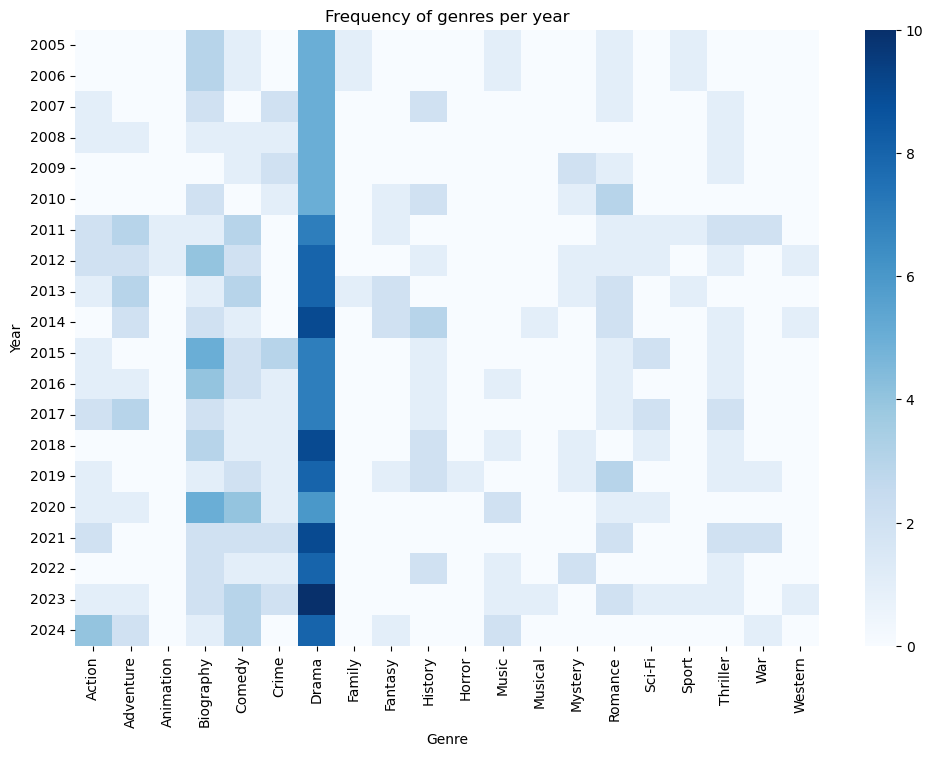

In [20]:
# Remove brackets and quotation marks from values in the 'Genre' column
df_awards['Genres'] = df_awards['Genres'].str.replace(r"[\[\]']", '', regex=True)

# Split column 'genres' into a list of genres
df_awards['Genres'] = df_awards['Genres'].apply(lambda x: x.split(','))

# Create a list of all unique genres
all_genres = list(set([genre.strip() for sublist in df_awards['Genres'] for genre in sublist]))

# Create an empty DataFrame with years as index and genders as columns
genre_year_counts = pd.DataFrame(index=df_awards['Year'].unique(), columns=all_genres).fillna(0)

# Fill in the DataFrame with the frequency of each genre per year
for idx, row in df_awards.iterrows():
    for genre in row['Genres']:
        genre_year_counts.loc[row['Year'], genre.strip()] += 1

# Sort the genres alphabetically
all_genres_sorted = sorted(all_genres)

# Reindex the DataFrame with the ordered genders
genre_year_counts = genre_year_counts.reindex(columns=all_genres_sorted)

# Heatmap creation
plt.figure(figsize=(12, 8))
sns.heatmap(genre_year_counts, cmap='Blues')
plt.title('Frequency of genres per year')
plt.xlabel('Genre')
plt.ylabel('Year')
plt.show()

In [45]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_awards

,Year,Genres
0,2005,"[Biography, Drama, Biography, Drama, Famil..."
1,2006,"[Biography, Drama, Biography, Drama, Famil..."
2,2007,"[Biography, Drama, History, Drama, Romance..."
3,2008,"[Action, Adventure, Drama, Crime, Drama, ..."
4,2009,"[Drama, Mystery, Romance, Drama, Comedy, ..."
5,2010,"[Crime, Drama, Romance, Biography, Drama, ..."
6,2011,"[Action, Adventure, Fantasy, Drama, Drama,..."
7,2012,"[Comedy, Drama, Romance, Biography, Drama,..."
8,2013,"[Drama, Drama, Fantasy, Comedy, Fantasy, ..."
9,2014,"[Drama, Musical, Romance, Adventure, Drama..."
